In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
books = pd.read_csv("Books.csv", sep=',')
books.head()

C:\Users\Toni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [214]:
bad_rows = pd.DataFrame(columns = books.columns)
for index, row in books.iterrows():
    yearOfPublication = row["Year-Of-Publication"]
    try:
        int(yearOfPublication)
    except ValueError:
        bad_rows = bad_rows.append(row)
        print(row["ISBN"] + " : " + row["Book-Title"])

078946697X : DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
2070426769 : Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
0789466953 : DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"


In [215]:
bad_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [216]:
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = "2000"
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = "2000"
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"


books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = "2003"
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de Les Bergers"

In [217]:
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [218]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [219]:
books.loc[books["Book-Author"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [220]:
books.loc[books["ISBN"] == "9627982032", "Book-Author"] = "Other"

In [221]:
books.loc[books["Publisher"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [222]:
books.loc[books["ISBN"] == "193169656X", "Publisher"] = "Novelbooks"
books.loc[books["ISBN"] == "1931696993", "Publisher"] = "CreateSpace"

In [223]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [224]:
books = books.drop(["Image-URL-S", "Image-URL-M", "Image-URL-L"], axis=1)
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [225]:
books["Year-Of-Publication"] = pd.to_numeric(books["Year-Of-Publication"] , errors='coerce')
print(sorted(books["Year-Of-Publication"].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [226]:
books.loc[(books["Year-Of-Publication"] > 2006) | (books["Year-Of-Publication"] < 1900), "Year-Of-Publication"] = np.NAN
yearOfPublicationMean = round(books["Year-Of-Publication"].mean())
books["Year-Of-Publication"].fillna(yearOfPublicationMean, inplace=True)
books["Year-Of-Publication"] = books["Year-Of-Publication"].astype("int")

In [227]:
books.describe()

,Year-Of-Publication
count,271360.000000
mean,1993.698091
std,8.067112
min,1900.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2006.000000


In [228]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

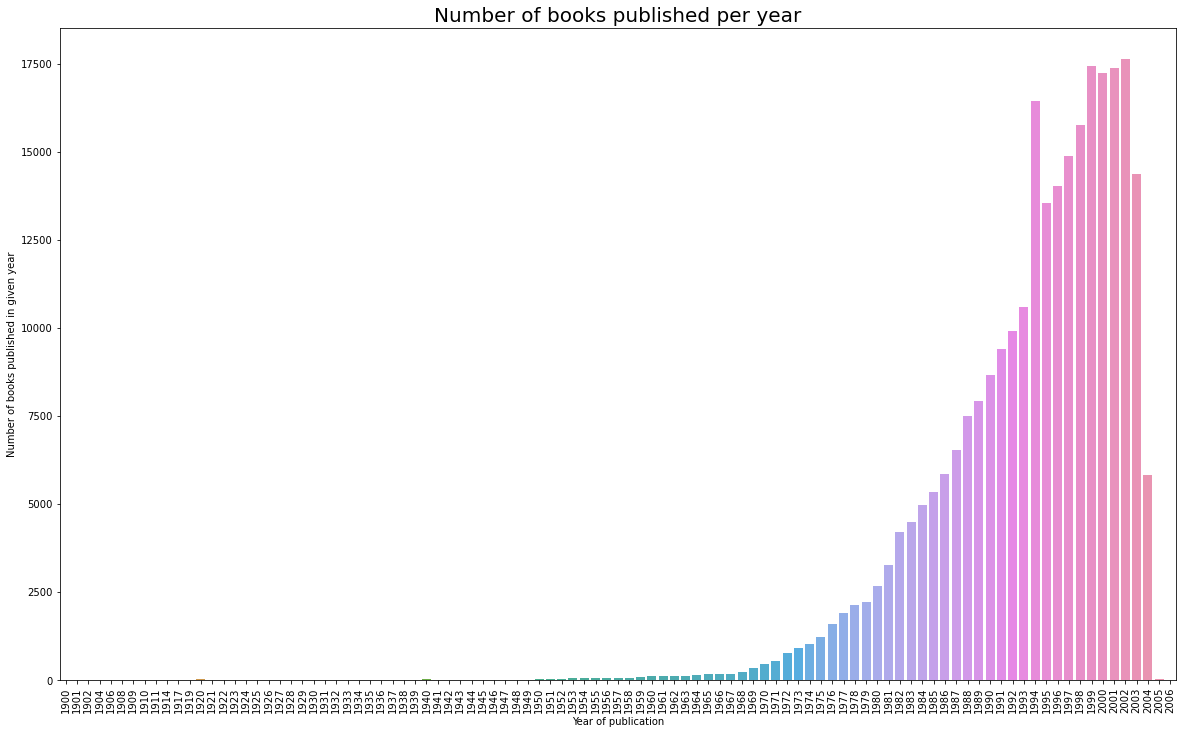

In [229]:
to_plot = books["Year-Of-Publication"].value_counts().reset_index()
to_plot.columns = ["Year-Of-Publication", "count"]

plt.figure(figsize=(20,12))
sns.barplot(x="Year-Of-Publication", y="count", data=to_plot)
plt.xlabel("Year of publication")
plt.xticks(rotation = 90)
plt.ylabel("Number of books published in given year")
plt.title("Number of books published per year", size=20)
plt.show()

In [230]:
users = pd.read_csv("Users.csv", sep=",", encoding="latin-1")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [231]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [232]:
users.count()

User-ID     278858
Location    278858
Age         168096
dtype: int64

In [233]:
ageMean = round(users["Age"].mean())
users["Age"].fillna(ageMean, inplace=True)
users["Age"] = users["Age"].astype("int")

In [234]:
import re

countries = [country.split(",")[-1].strip() for country in users["Location"].tolist()]
for i, country in enumerate(countries):
    countries[i] = re.sub(r'[^a-zA-Z ]+', '', country)
len(countries)
list(set(countries))

['',
 'united state',
 'la svizzera',
 'good old usa',
 'london',
 'peru',
 'calabria',
 'the philippines',
 'holland',
 'pueblo',
 'sierra leone',
 'ventura',
 'galiza',
 'england',
 'la chine ternelle ',
 'everywhere and anywhere',
 'tunisia',
 'zambia',
 'gb',
 'germay',
 'sri lanka',
 'euskadi',
 'belgique',
 'denmark',
 'israel',
 'nyhamnslge',
 'burlington',
 'los estados unidos de norte america',
 'dominican republic',
 'lj',
 'samoa',
 'andorra',
 'st clair',
 'cuba',
 'clinton',
 'victoria',
 'somewherein space',
 'jamaica',
 'slovakia',
 'italia',
 'prc',
 'no more',
 'slo',
 'channel islands',
 'norway',
 'italy',
 'monroe',
 'maracopa',
 'vatican city',
 'azerbaijan',
 'la argentina',
 'distrito federal',
 'pr',
 'pippo',
 'chad',
 'united statea',
 'peoples republic of china',
 'safrica',
 'republic of korea',
 'a',
 'palau',
 'the world tomorrow',
 'rutherford',
 'rmi',
 'zimbabwe',
 'allen',
 'uganda',
 'neverland',
 'saint lucia',
 'saint kitts and nevis',
 'fiji',
 'ma

In [235]:
users["Location"] = users["Location"].map(lambda c: re.sub(r'[^a-zA-Z ]+', '', c.split(",")[-1].strip()))
#users.groupby("Location").count().nlargest(30).plot(kind = 'bar')
#df1 = users.groupby('Location').size().sort_values(ascending=False).reset_index(name='count')

In [236]:
users["Location"].unique()
len(users["Location"].unique())

597

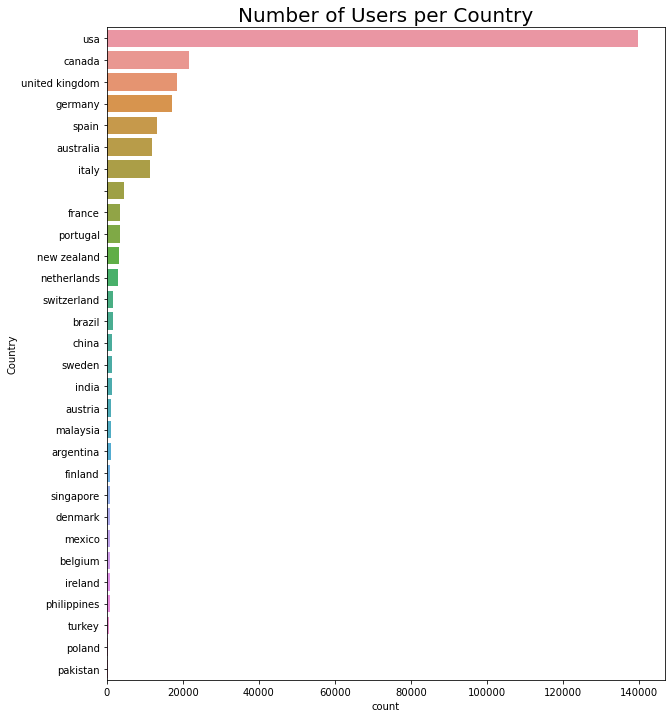

In [237]:
to_plot = users["Location"].value_counts().head(30).reset_index()
to_plot.columns = ["Location", "count"]

plt.figure(figsize=(10,12))
sns.barplot(x="count", y="Location", data=to_plot)
plt.ylabel("Country")
plt.title("Number of Users per Country", size=20)
plt.show()

In [238]:
x = users["Location"].value_counts().reset_index()
x.columns = ["Location", "count"]
x.loc[x["count"] >= 3]

,Location,count
0,usa,139715
1,canada,21658
2,united kingdom,18557
3,germany,17073
4,spain,13258
...,...,...
203,vanuatu,3
204,bhutan,3
205,lazio,3
206,belgique,3


In [239]:
users.head(30)

,User-ID,Location,Age
0,1,usa,35
1,2,usa,18
2,3,russia,35
3,4,portugal,17
4,5,united kingdom,35
5,6,usa,61
6,7,usa,35
7,8,canada,35
8,9,usa,35
9,10,spain,26


In [240]:
ratings = pd.read_csv("Ratings.csv", sep=',')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [241]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [242]:
df = pd.merge(users, ratings, on = "User-ID")
df = pd.merge(df, books, on = "ISBN")
df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,usa,18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,canada,35,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,canada,49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,na,35,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,canada,35,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [243]:
most_rated_authors = df["Book-Author"].value_counts().to_frame()

In [244]:
most_rated_books = df["Book-Title"].value_counts().to_frame()
most_rated_books

,Book-Title
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
...,...
Skating Camp (Silver Blades),1
Chronology of Words and Phrases: A Thousand Years in the History of English,1
My Grandmother's Journey,1
Death in the Spirit House,1


In [245]:
df_implicit = df.loc[df["Book-Rating"] == 0]
df_explicit = df.loc[df["Book-Rating"] > 0]

In [246]:
df_implicit

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,usa,18,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2,11400,canada,49,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,canada,35,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
6,85526,canada,36,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
7,96054,canada,29,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
...,...,...,...,...,...,...,...,...,...
1031126,278843,usa,28,1874061149,0,The Queen's Gambit,Walter Tevis,1996,Texas Bookman
1031127,278849,canada,23,0920656307,0,Secret of Willow Castle,Ly Cook,1911,Firefly Books Ltd
1031128,278851,usa,33,0028630289,0,Frommer's 2000 California (Frommer's Californi...,Erika Lenkert,1999,Frommer's
1031129,278851,usa,33,0312266448,0,The Military Quotation Book : Revised and Expa...,James Charlton,2002,Thomas Dunne Books


In [247]:
df_explicit

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,8,canada,35,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,na,35,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
5,67544,canada,30,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
8,116866,,35,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
9,123629,canada,35,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
...,...,...,...,...,...,...,...,...,...
1031130,278851,usa,33,067161746X,7,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987,Pocket Books
1031132,278851,usa,33,0767907566,5,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books
1031133,278851,usa,33,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books
1031134,278851,usa,33,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books


In [248]:
df_explicit.isna().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [249]:
from sklearn.preprocessing import StandardScaler

scaled_df = df[["Age", "Book-Rating", "Year-Of-Publication"]]
X = scaled_df.values[:, 1:]
#X = np.nan_to_num(X)
scaler  = StandardScaler().fit(scaled_df)
df[["Age", "Book-Rating", "Year-Of-Publication"]] = scaler.transform(scaled_df)

In [250]:
df

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,usa,-1.550107,0195153448,-0.736621,Classical Mythology,Mark P. O. Morford,0.925635,Oxford University Press
1,8,canada,-0.144797,0002005018,0.560680,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
2,11400,canada,1.012516,0002005018,-0.736621,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
3,11676,na,-0.144797,0002005018,1.339061,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
4,41385,canada,-0.144797,0002005018,-0.736621,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
...,...,...,...,...,...,...,...,...,...
1031131,278851,usa,-0.310128,0743203763,-0.736621,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,0.649969,Simon &amp; Schuster
1031132,278851,usa,-0.310128,0767907566,0.560680,All Elevations Unknown: An Adventure in the He...,Sam Lightner,0.787802,Broadway Books
1031133,278851,usa,-0.310128,0884159221,1.079601,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,-1.417526,Lone Star Books
1031134,278851,usa,-0.310128,0912333022,1.079601,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,0.236470,Kqed Books


In [251]:
df = df.drop(["User-ID", "ISBN"], axis=1)
df

,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,usa,-1.550107,0195153448,-0.736621,Classical Mythology,Mark P. O. Morford,0.925635,Oxford University Press
1,canada,-0.144797,0002005018,0.560680,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
2,canada,1.012516,0002005018,-0.736621,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
3,na,-0.144797,0002005018,1.339061,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
4,canada,-0.144797,0002005018,-0.736621,Clara Callan,Richard Bruce Wright,0.787802,HarperFlamingo Canada
...,...,...,...,...,...,...,...,...
1031131,usa,-0.310128,0743203763,-0.736621,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,0.649969,Simon &amp; Schuster
1031132,usa,-0.310128,0767907566,0.560680,All Elevations Unknown: An Adventure in the He...,Sam Lightner,0.787802,Broadway Books
1031133,usa,-0.310128,0884159221,1.079601,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,-1.417526,Lone Star Books
1031134,usa,-0.310128,0912333022,1.079601,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,0.236470,Kqed Books


In [252]:
from sklearn import preprocessing
leLocation = preprocessing.LabelEncoder()
#leLocation.fit(df["Location"])
#df["Location"] = leLocation.transform(df["Location"])

In [253]:
leBookTitle = preprocessing.LabelEncoder()
#leBookTitle.fit(df["Book-Title"])
#df["Book-Title"] = leBookTitle.transform(df["Book-Title"])

In [254]:
leBookAuthor = preprocessing.LabelEncoder()
#leBookAuthor.fit(df["Book-Author"])
#df["Book-Author"] = leBookAuthor.transform(df["Book-Author"])

In [255]:
lePublisher = preprocessing.LabelEncoder()
#lePublisher.fit(df["Publisher"])
#df["Publisher"] = lePublisher.transform(df["Publisher"])

In [256]:
#locationsFreqs= (df.groupby("Location").size()) / len(df)
#df["Location"] = df["Location"].apply(lambda x : locationsFreqs[x])

#bookTitlesFreqs = (df.groupby("Book-Title").size()) / len(df)
#df["Book-Title"] = df["Book-Title"].apply(lambda x : bookTitlesFreqs[x])

#bookAuthorFreqs = (df.groupby("Book-Author").size()) / len(df)
#df["Book-Author"] = df["Book-Author"].apply(lambda x : bookAuthorFreqs[x])

#publisherFreqs = (df.groupby("Publisher").size()) / len(df)
#df["Publisher"] = df["Publisher"].apply(lambda x : publisherFreqs[x])

#df

In [257]:
from sklearn.preprocessing import OneHotEncoder
df["Location"] = OneHotEncoder().fit_transform(df["Location"])

   Location_  Location_afghanistan  Location_alachua  Location_albania  \
0          0                     0                 0                 0   
1          0                     0                 0                 0   
2          0                     0                 0                 0   
3          0                     0                 0                 0   
4          0                     0                 0                 0   

   Location_alderney  Location_algeria  Location_america  Location_andorra  \
0                  0                 0                 0                 0   
1                  0                 0                 0                 0   
2                  0                 0                 0                 0   
3                  0                 0                 0                 0   
4                  0                 0                 0                 0   

   Location_angola  Location_antarctica  ...  Location_ventura county  \
0            

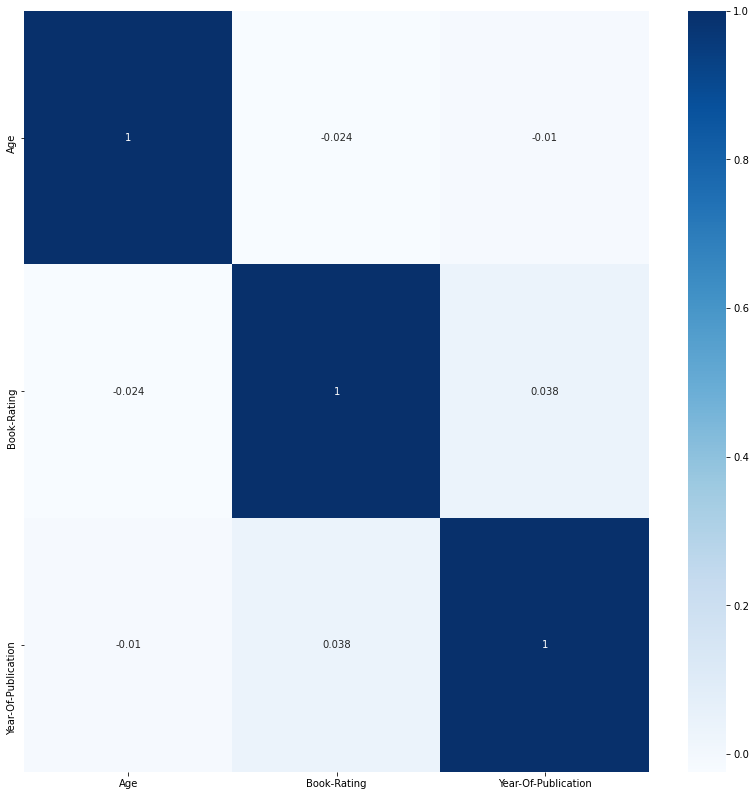

In [258]:
# Finding parameter correlations
fig, ax = plt.subplots(figsize=(14, 14))
corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap='Blues')

In [259]:
from sklearn.cluster import KMeans
df2 = df
# finding optimal number of clusters
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2)
    distortions.append(kmeanModel.inertia_)

# Ploting Elbow Method in order to find optimal k
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

ValueError: could not convert string to float: 'usa'

In [ ]:
kmeanModel = KMeans(n_clusters = 3)
kmeanModel.fit(df2)

clust_labels = kmeanModel.predict(df2)
centers = kmeanModel.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df2["Book-Rating"], df2["Age"], c=pd.DataFrame(kmeanModel.predict(df2)))
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book Rating' )
ax.set_ylabel('Age')
ax.grid(True)

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df2["Book-Rating"], df2["Book-Title"], c=pd.DataFrame(kmeanModel.predict(df2)))
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book Rating')
ax.set_ylabel('Title')
ax.grid(True)

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df2["Book-Rating"], df2["Book-Author"], c=pd.DataFrame(kmeanModel.predict(df2)))
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book Rating')
ax.set_ylabel('Author')
ax.grid(True)

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(df2["Book-Author"], df2["Book-Author"], df2['Age'], df2['Book-Rating'], c=pd.DataFrame(kmeanModel.predict(df2)))
ax.set_title('K-Means Clustering')
ax.set_xlabel('Book Author')
ax.set_ylabel('Publisher')
ax.set_zlabel('Book Rating')